<a href="https://colab.research.google.com/github/zziziz/2025-1-BDA/blob/main/inclass/05w_A_mon_0407_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##05주 수업

##  05-3 파생변수 생성 p116

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np

df = pd.DataFrame({'var1' : [4, 3, 8], 'var2':[2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [ ]:
df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [ ]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [ ]:
id(df_new) == id(df_raw)

False

In [ ]:
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [ ]:
df_new.rename(columns = {'var2' : 'v2'}, inplace=True)
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [ ]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [ ]:
df_new.rename(index = {0: 'x', 1: 'y', 2: 'z'}, inplace=True)
df_new

,var1,v2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B":"c"})

,a,c
0,1,4
1,2,5
2,3,6


## mpg 연비 변수 생성

In [20]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 4.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [21]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [22]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
38,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact


In [23]:
mpg.total = (mpg.cty + mpg.hwy) / 2
mpg.head()

<ipython-input-23-0e68e0222155>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cty + mpg.hwy) / 2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
mpg['totla'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,totla
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [26]:
mpg['mpg_mean']= mpg[['cty', 'hwy']].mean(axis='columns')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,totla,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [27]:
sum(mpg.total)/len(mpg)

20.14957264957265

##조건문 활용

In [28]:
mpg.total.describe()

,0
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


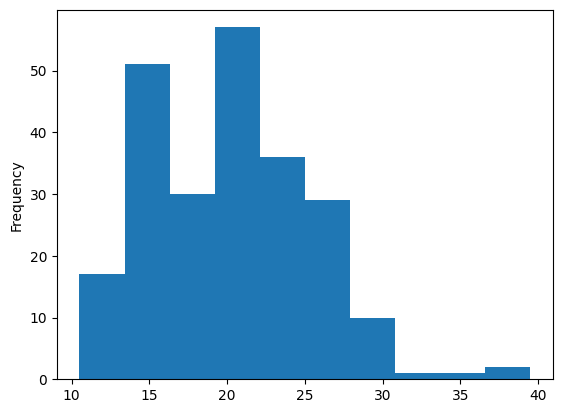

In [29]:
mpg.total.plot.hist();

In [30]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.9 MB/s eta 0:00:00


In [32]:
import koreanize_matplotlib

In [35]:
%config InineBackend.figure_format = 'retina'

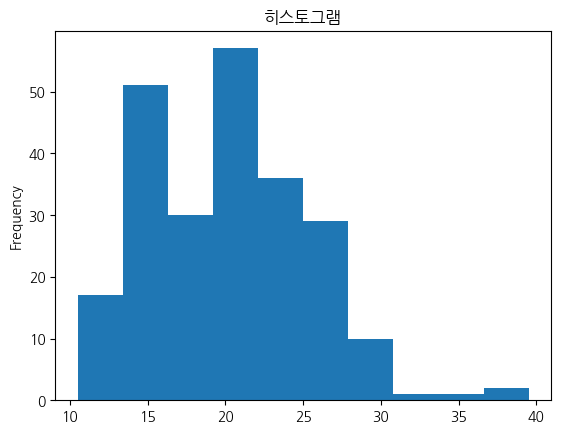

In [40]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2 # Use brackets to create a new column named 'total'
mpg['total'].plot(kind="hist", title="히스토그램");

## np.wherre()

In [39]:
np.where(mpg.total >= 20, 'pass', 'fail')

array(['pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'fail',
       'fail', 'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
      

In [41]:
mpg['test'] = np.where(mpg.total >= 20, 'pass', 'fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,totla,mpg_mean,total,test
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv,15.5,15.5,15.5,fail
111,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize,26.0,26.0,26.0,pass
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5,10.5,10.5,fail
170,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact,23.5,23.5,23.5,pass
94,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact,18.0,18.0,18.0,fail


In [42]:
mpg['test'].value_counts()

,count
test,
pass,128
fail,106


In [44]:
mpg['test'].unique()

array(['pass', 'fail'], dtype=object)

In [45]:
count_test = mpg['test'].value_counts()

<Axes: xlabel='test'>

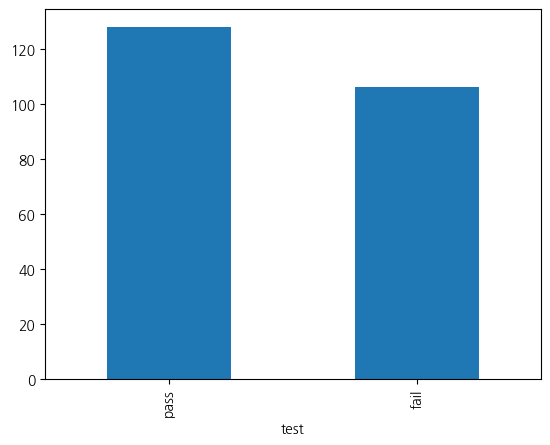

In [46]:
count_test.plot.bar()

<Axes: xlabel='test'>

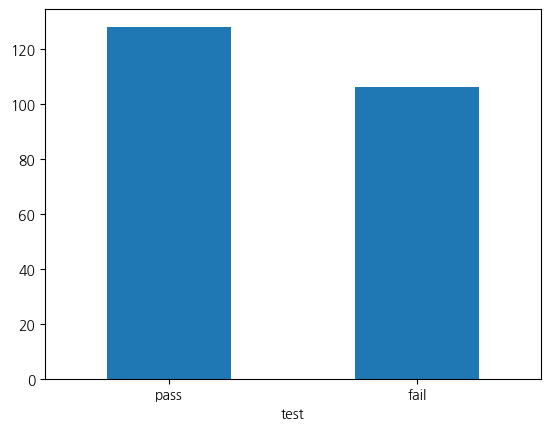

In [47]:
count_test.plot.bar(rot=0)

In [51]:
type(mpg.test.value_counts())

pandas.core.series.Series

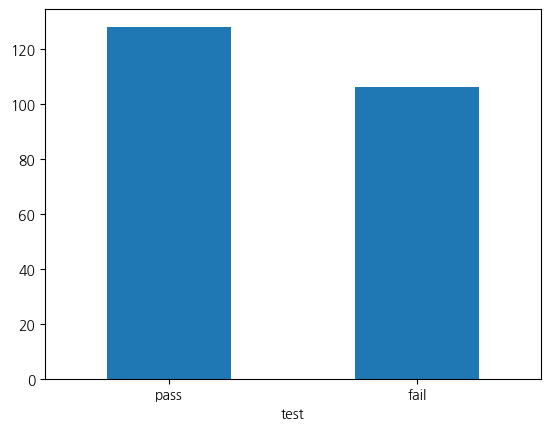

In [53]:
mpg.test.value_counts().plot.bar(rot=0);

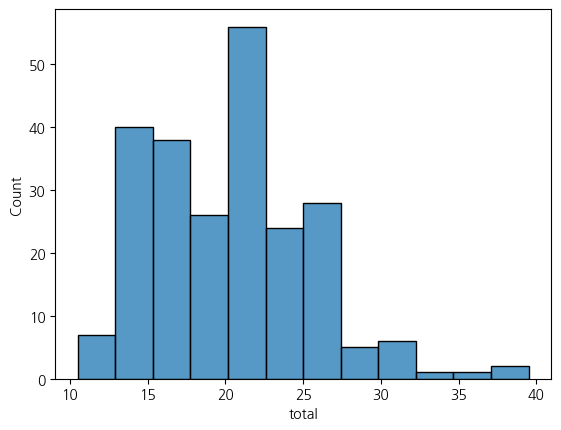

In [55]:
import seaborn as sns

sns.histplot(mpg, x="total"); # x=mpg.total

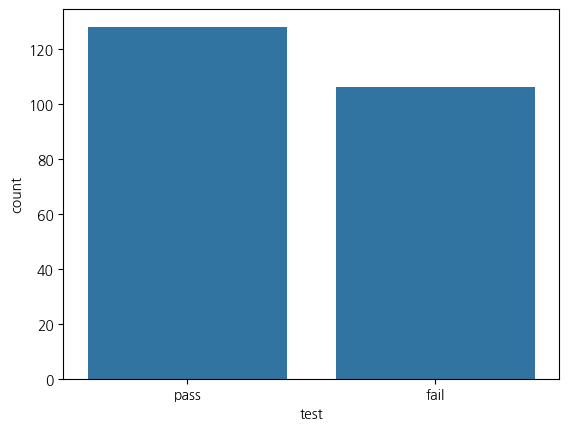

In [56]:
sns.countplot(mpg, x='test');

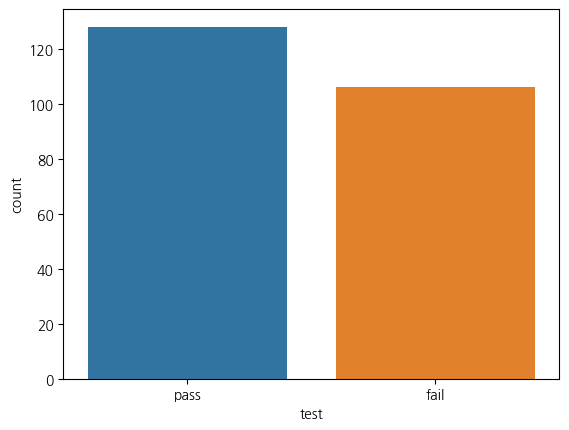

In [57]:
sns.countplot(mpg, x='test', hue='test');

<Axes: xlabel='test', ylabel='percent'>

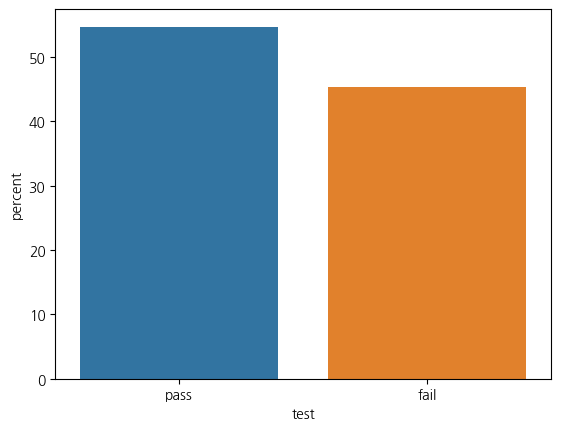

In [59]:
sns.countplot(mpg, x='test', hue='test', stat='percent')

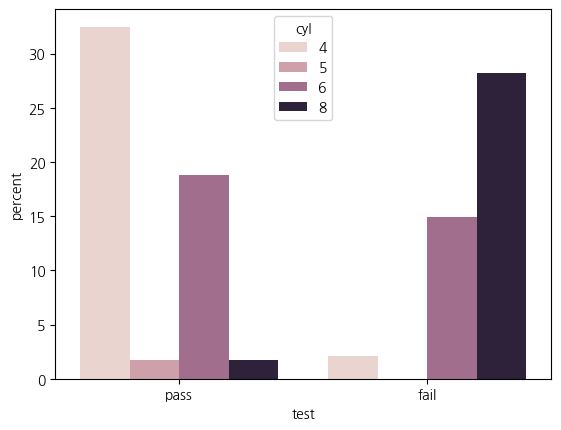

In [60]:
sns.countplot(mpg, x='test', hue='cyl', stat='percent');

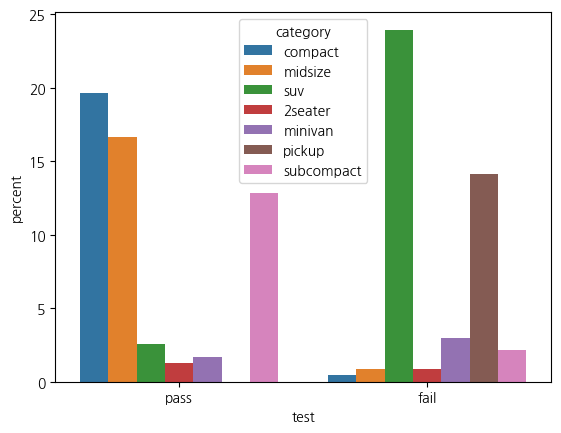

In [61]:
sns.countplot(mpg, x='test', hue='category', stat='percent');

In [62]:
mpg['grade'] = np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 20, 'B', 'C'))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,totla,mpg_mean,total,test,grade
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv,16.0,16.0,16.0,fail,C
186,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact,24.0,24.0,24.0,pass,B
182,toyota,camry,2.4,2008,4,auto(l5),f,21,31,r,midsize,26.0,26.0,26.0,pass,B
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,21.0,21.0,21.0,pass,B
63,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv,13.0,13.0,13.0,fail,C


In [63]:
n_grade = mpg.grade.value_counts()
n_grade

,count
grade,
B,118
C,106
A,10


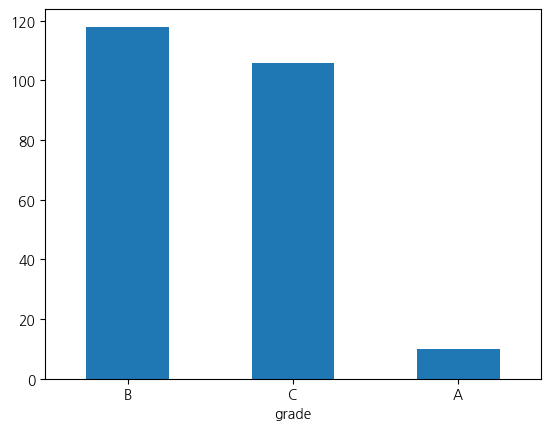

In [64]:
n_grade.plot.bar(rot=0);

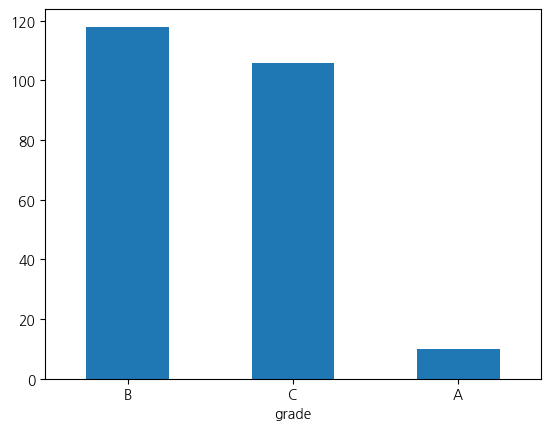

In [66]:
n_grade.plot.bar(rot=0);

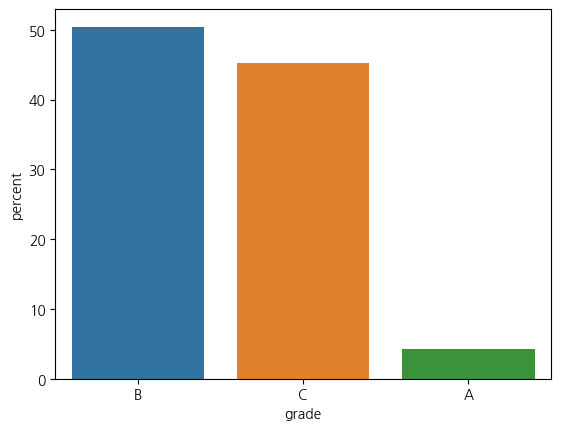

In [67]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent');

In [68]:
mpg.grade.value_counts().index

Index(['B', 'C', 'A'], dtype='object', name='grade')

In [69]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

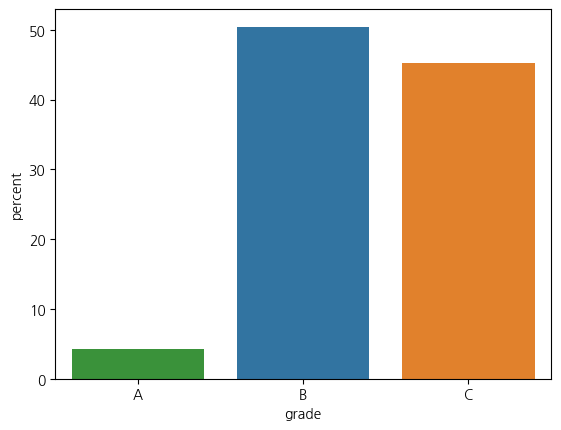

In [70]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=mpg.grade.value_counts().sort_index().index);

In [71]:
np.sort(mpg.grade.unique())

array(['A', 'B', 'C'], dtype=object)

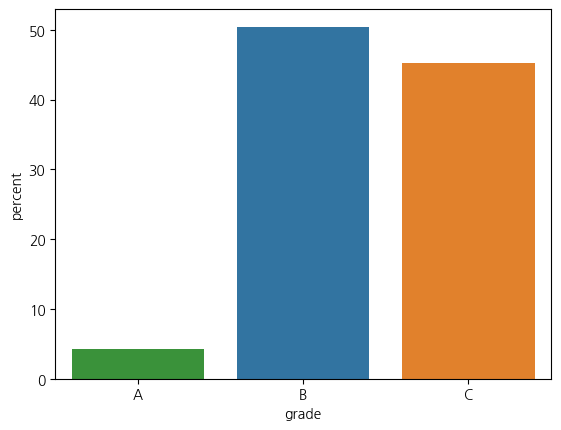

In [72]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=np.sort(mpg.grade.unique()));

In [73]:
s = mpg.grade
s = s.value_counts()
s= s.sort_index()
type(s)

pandas.core.series.Series

In [74]:
s = mpg.grade.value_counts().sort_index()
type(s)

pandas.core.series.Series

In [75]:
mpg['grade2'] = np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 25, 'B', np.where(mpg.total >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,totla,mpg_mean,total,test,grade,grade2
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan,14.0,14.0,14.0,fail,C,D
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5,10.5,10.5,fail,C,D
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv,16.5,16.5,16.5,fail,C,D
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5,10.5,10.5,fail,C,D
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,19.5,19.5,fail,C,D


In [76]:
mpg['grade2'] = np.where(mpg.total >= 30, 'A',
                np.where(mpg.total >= 25, 'B',
                np.where(mpg.total >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,totla,mpg_mean,total,test,grade,grade2
47,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan,19.5,19.5,19.5,fail,C,D
207,volkswagen,gti,2.0,1999,4,manual(m5),f,21,29,r,compact,25.0,25.0,25.0,pass,B,B
148,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize,22.0,22.0,22.0,pass,B,C
45,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,21,r,minivan,18.0,18.0,18.0,fail,C,D
152,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv,17.0,17.0,17.0,fail,C,D


In [77]:
mpg['size'] = np.where(mpg.category.isin(['compact', 'subcompact', '2seater']), 'small', 'large')
mpg['size'].value_counts()

,count
size,
large,147
small,87


##정리하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<Axes: xlabel='test'>

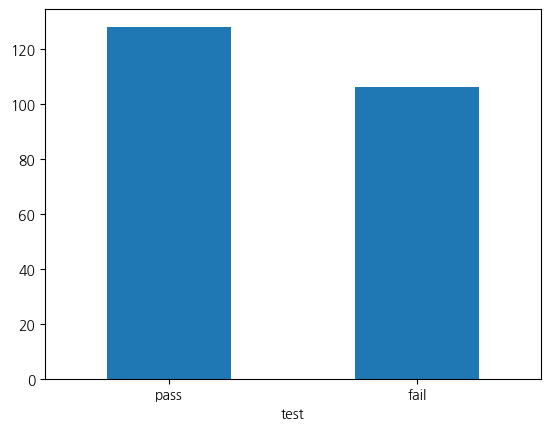

In [78]:

# 1. 패키지 로드
import pandas as pd
import numpy as np

# 2. 데이터 불러오기
mpg = pd.read_csv('data/mpg.csv')

# 3. 데이터 파악하기
mpg.shape       # 행, 열 수
mpg.head()      # 데이터 앞부분
mpg.tail()      # 데이터 뒷부분
mpg.info()      # 속성
mpg.describe()  # 요약 통계량

# 4. 변수명 바꾸기
mpg = mpg.rename(columns = {'manufacturer' : 'company'})

# 5. 파생변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2                  # 변수 조합
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')  # 조건문 활용

# 6. 빈도 확인하기
count_test = mpg['test'].value_counts()  # 빈도표 만들기
count_test.plot.bar(rot = 0)             # 빈도 막대 그래프 만들기

##단원 06

In [79]:
exam = pd.read_csv('data/exam.csv')
exam.sample(5)

,id,nclass,math,english,science
6,7,2,80,90,45
19,20,5,78,83,58
16,17,5,65,68,98
1,2,1,60,97,60
0,1,1,50,98,50


In [80]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [81]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [82]:
# 1반이면서 수학 점수가 50 점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [83]:
exam[(exam.nclass == 1) & (exam.math >= 50)] # 괄호를 반드시 사용

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [84]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [86]:
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [87]:
exam.query('nclass.isin([1, 3, 5])')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [88]:
exam.sort_index(ascending=False, axis=1)

,science,nclass,math,id,english
0,50,1,50,1,98
1,60,1,60,2,97
2,78,1,45,3,86
3,58,1,30,4,98
4,65,2,25,5,80
5,98,2,50,6,89
6,45,2,80,7,90
7,25,2,90,8,78
8,15,3,20,9,98
9,45,3,50,10,98


##종료